In [15]:
import pandas as pd
import neo4j
import seaborn as sns

In [16]:
driver = neo4j.GraphDatabase.driver(uri="bolt://localhost:7687", auth=("neo4j", "senate"))

In [17]:

def run(query):
    data = []
    with driver.session() as session:
        result = session.run(query)
        for record in result:
            data.append(record.data())
    return pd.DataFrame(data)

In [18]:
senator_donation_likes = run("""
MATCH (c:Contributor)-[d:DonatedTo]->(s:Senator)-[tw:Tweeted]->(t:Tweet)
RETURN s.name, sum(d.amount) as donations, s.party, sum(t.likes) as likes
ORDER BY sum(t.likes) DESC
""")

In [20]:
senator_donation_likes

,s.name,donations,s.party,likes
0,Mitt Romney,67813200,republican,22513950
1,Bernie Sanders,19227700,other,20708720
2,Marsha Blackburn,107143100,republican,10153120
3,Marco Rubio,71373542,republican,7192900
4,Elizabeth Warren,85030800,democrat,6564280
...,...,...,...,...
71,Jeanne Shaheen,84383046,democrat,40280
72,John Boozman,66459381,republican,38100
73,Mike Crapo,62119332,republican,36220
74,Bill Cassidy,58420250,republican,25380


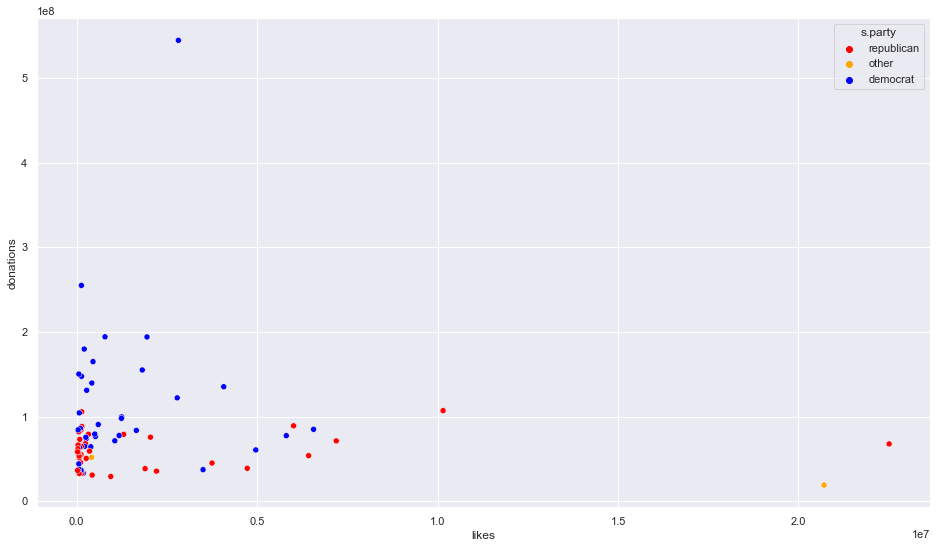

In [30]:
sns.scatterplot(data=senator_donation_likes, x="likes", y="donations", hue="s.party", 
palette=dict(republican="red", democrat="blue", other="orange")
)
sns.set(rc={'figure.figsize':(16, 9)})
#sns.regplot(data=senator_donation_likes, x="likes", y="donations")

In [39]:
mitt_tweets = run("""
MATCH (s:Senator {name: "Mitt Romney"})-[tw:Tweeted]->(t:Tweet)
RETURN s.name, t.likes, t.text
ORDER BY t.likes DESC
""")
mitt_tweets["t.text"]

0     Shame falls on a party that would censure pers...
1     Tulsi Gabbard is parroting false Russian propa...
2     Mike Rounds speaks truth knowing that our Repu...
3     Accounts of battlefield bravery have long insp...
4     I join the world in awe of true heroes: the co...
                            ...                        
87    RT @SenatorRomney: It’s unacceptable that Chin...
88    RT @GovCox: Alongside generous business and co...
89    RT @SenatorRomney: Sad to see what’s being don...
90    RT @UAEEmbassyUS: Thank you @MittRomney for th...
91    RT @SenatorRomney: A diplomatic boycott of the...
Name: t.text, Length: 92, dtype: object